In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading the Datasets

historical_data = pd.read_csv("C:/Users/pc/Desktop/Amdari/ENergy market resilieNce metrics project/historical_energy_data.csv")
infrastructure_data = pd.read_csv("C:/Users/pc/Desktop/Amdari/ENergy market resilieNce metrics project/infrastructure_data.csv")
market_data = pd.read_csv("C:/Users/pc/Desktop/Amdari/ENergy market resilieNce metrics project/market_data.csv")
regulatory_data = pd.read_csv("C:/Users/pc/Desktop/Amdari/ENergy market resilieNce metrics project/regulatory_data.csv")

`Cleaning the Datasets`: Changing column datatypes to the appropriate datatypes

In [4]:
date_format = "%d/%m/%Y"
historical_data["Date/Time"] = pd.to_datetime(historical_data["Date/Time"], format = date_format)
infrastructure_data["Date/Time"] = pd.to_datetime(infrastructure_data["Date/Time"], format = date_format)

new_format = "%Y-%m-%d"
historical_data["Date/Time"] = pd.to_datetime(historical_data["Date/Time"], format = new_format)
infrastructure_data["Date/Time"] = pd.to_datetime(infrastructure_data["Date/Time"], format = new_format)

In [5]:
new_format = "%Y-%m-%d"
market_data["Date/Time"] = pd.to_datetime(market_data["Date/Time"], format = new_format)
regulatory_data["Date/Time"] = pd.to_datetime(regulatory_data["Date/Time"], format = new_format)

`Investigating Categorical Columns` 

In [6]:
datasets = {"historical_data": historical_data, "infrastructure_data": infrastructure_data, "market_data": market_data, 
          "regulatory_data": regulatory_data}

In [7]:
categorical_columns = {
    "historical_data": ["Location/Region", "Energy Source"],
    "infrastructure_data": ["Infrastructure Status", "Maintenance Activities", "Technology Limitations"],
    "market_data": ["Competitor Data", "Market Trends"],
    "regulatory_data": ["Regulatory Changes", "Compliance Status"]
}

In [8]:
categorical_value_counts = {}

In [9]:
for dataset, columns in categorical_columns.items():
    for column in columns:
        categorical_value_counts[(dataset,column)] = datasets[dataset][column].value_counts()

Visualizations

In [10]:
# Calculating the numer of rows and columns for the subplots
rows = (len(categorical_value_counts) + 1) // 2
cols = 2

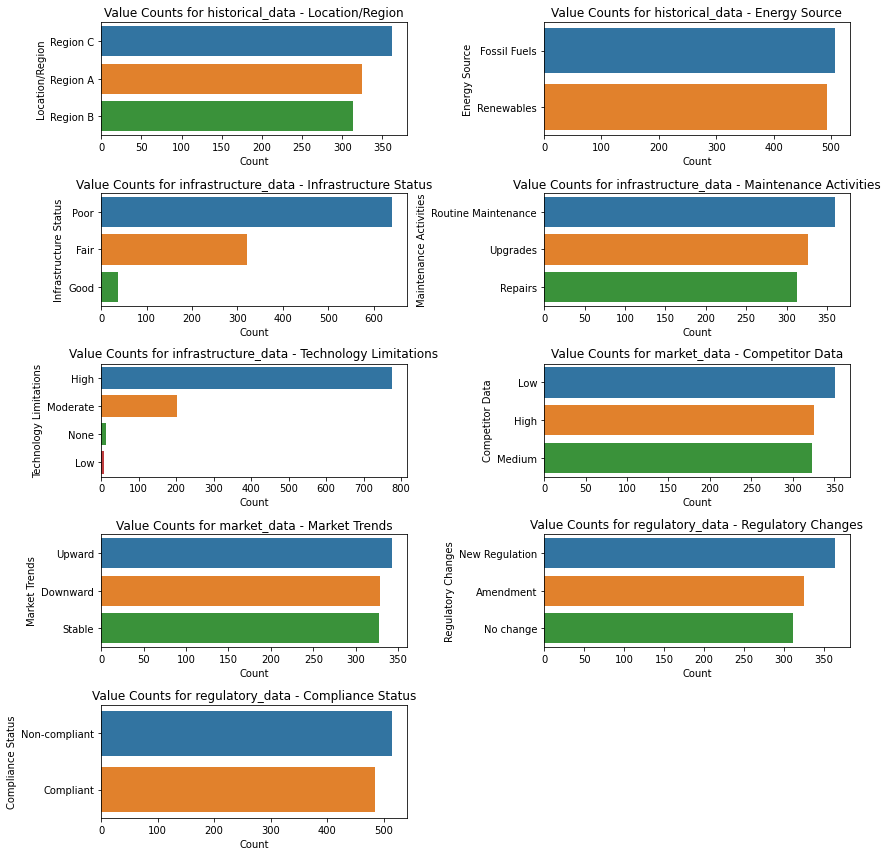

In [11]:
# Create a grid of the subplots
fig, axes = plt.subplots(rows, cols, figsize =((12, 12)))

# flatten the axes for easier indexing
axes = axes.flatten()

#  Iterate through categorical columns and plot them in the subplots
for plot, ((dataset,column), counts) in enumerate(categorical_value_counts.items()):
    ax = axes[plot]
    sns.barplot(x = counts.values, y = counts.index, ax=ax)
    ax.set_title(f"Value Counts for {dataset} - {column}")
    ax.set_xlabel("Count")
    ax.set_ylabel(column)
    
# Hide empty plots
for i in range(len(categorical_value_counts), rows * cols):
    fig.delaxes(axes[i])
    
# Adjust plots
plt.tight_layout()

plt.show()

#### Energy Demand, Production and Consumption Over Time
* Examine the trends in demand, production and consumption from the `historical_energy_data` dataset
* This will give us insight into fluctuations and potential vulnerabilities in the energy market.

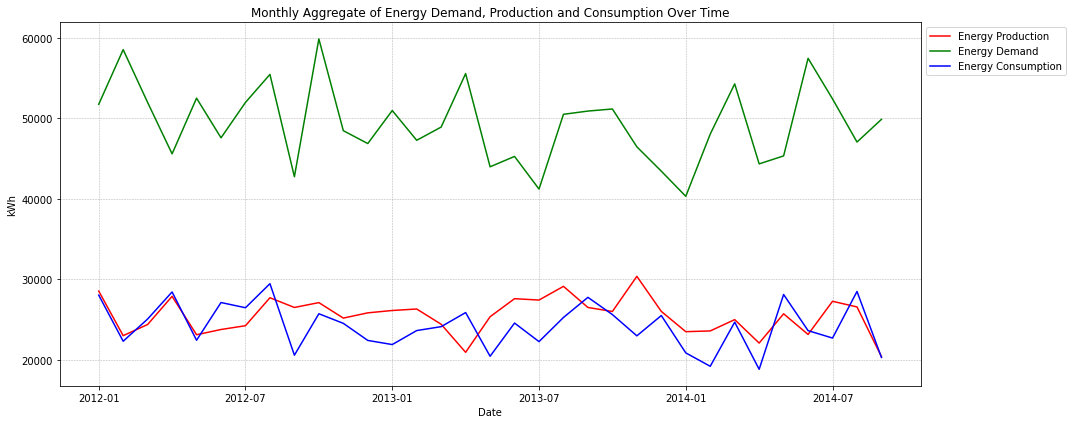

In [12]:
# Extracting the year and month from the "Date/Time" column into new columns
historical_data["Month"] = historical_data["Date/Time"].dt.month
historical_data["Year"] = historical_data["Date/Time"].dt.year

#  Create a "Year-Month" column
historical_data["Year-Month"] = historical_data["Date/Time"].dt.to_period("M")

# Aggregate for each month
monthly_data = historical_data.groupby("Year-Month").mean()

#  Setting figsize
plt.figure(figsize = (15,6))

# Plotting
sns.lineplot(data= monthly_data, x= monthly_data.index.astype(str), y= "Energy Production (kWh)", label= "Energy Production", 
            color= "red", linestyle= "-", linewidth= 1.5,ci= None)
sns.lineplot(data= monthly_data, x= monthly_data.index.astype(str), y= "Energy Demand", label= "Energy Demand",
            color= "green", linestyle= "-", linewidth= 1.5,ci= None)
sns.lineplot(data= monthly_data, x= monthly_data.index.astype(str), y= "Energy Consumption (kWh)", label= "Energy Consumption",
            color= "blue", linestyle= "-", linewidth= 1.5, ci= None)

# Setting title and labels
plt.title("Monthly Aggregate of Energy Demand, Production and Consumption Over Time")
plt.xlabel("Date")
plt.ylabel("kWh")
plt.legend(loc= "upper left", bbox_to_anchor= (1,1))
plt.grid(True, which= "both", linestyle= "--", linewidth= 0.5)

# Setting our labels
labels = monthly_data.index.astype(str).to_list()
n = 6
plt.xticks(labels[::n], rotation=360)

plt.tight_layout()
plt.subplots_adjust(hspace= 0.5)

plt.show()

From our visualization above, we can see that energy demand is significantly higher than energy production and consumption. This could reduce their share in the energy market as their production is so low compared to the demand, making consumers leave to competitors. We can see that there are  sharp spikes in the data, meaning that there is no stability in the flow of things and could also potential disruptions.

#### Market Price and Energy Price Over Time
* To understand the pricing dynamics and its relation to market trends.
* Visualization of the `Market Price` from the `market_data dataset` and the `Energy Price` from the `historical_energy_data` dataset

In [13]:
# Merging historical_data and market_data on "Date/Time" column
merged_data = pd.merge(historical_data, market_data, on= "Date/Time", how= "inner")

# Setting "Date/Time" as the index of the dataframe for aggregation
merged_data["Month"] = merged_data["Date/Time"].dt.month
merged_data["Year"] = merged_data["Date/Time"].dt.year

#Create a "Year-Month" column for plotting
merged_data["Year-Month"] = merged_data["Date/Time"].dt.to_period("M")

#  Aggregating the data on a monthly asis.
monthly_merged_data = merged_data.groupby("Year-Month").mean()

monthly_merged_data = monthly_merged_data.rename(columns={"Year-Month": "Index"})

# Making "Year-Month" the index
# monthly_merged_data["Year-Month"] = monthly_merged_data.index.astype(str)

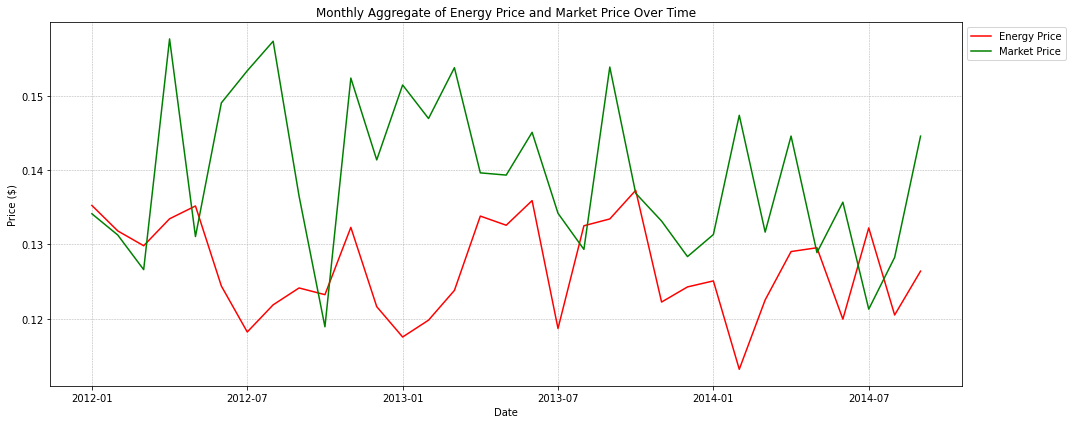

In [15]:
# Plotting
plt.figure(figsize= (15, 6))

sns.lineplot(data= monthly_merged_data, x= monthly_merged_data.index.astype(str), y= "Energy Price", label= "Energy Price", color= "red",
            linestyle= "-", linewidth= 1.5, ci= None)
sns.lineplot(data= monthly_merged_data, x= monthly_merged_data.index.astype(str), y= "Market Price", label= "Market Price", color= "green",
             linestyle= "-", linewidth= 1.5, ci= None)

plt.title("Monthly Aggregate of Energy Price and Market Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend(loc= "upper left", bbox_to_anchor=(1,1))
plt.grid(True, which= "both", linestyle= "--", linewidth= 0.5)

# Setting our labels
labels = monthly_merged_data.index.astype(str).to_list()
n = 6
plt.xticks(labels[::n], rotation=360)

plt.tight_layout()
plt.subplots_adjust(hspace= 0.5)

plt.show()

Energy price is the price that Energix sells its energy while market price is price of other competitors in the market.From this visualization, we can see that both prices fluctuates over time. Energy price is notably lower compared to market price i.e Energix sells at a lower rate than its competitors.This could be why their demand is so high compared to their production We'll need to have a deeper look into why they set their prices so low in order to understand them better. We can see some sharp spikes in both prices which may indicate disruptions, regulatory changes or significant market events.

#### Demand Correlation With Energy Price
* Let's see if Energy Demand is influenced by energy price

In [16]:
market_correlation = merged_data["Market Demand"].corr(merged_data["Market Price"])
energy_correlation = merged_data["Energy Demand"].corr(merged_data["Energy Price"])

In [17]:
print("market: ", market_correlation)

print("energy: ", energy_correlation)

market:  0.029802302148288527
energy:  -0.005361840768503411


Previously, we assumed that because Energix price was lower than that of their competitors and their demand was so high it meant that it was high because of their low price. With this we can say that price is not at all a deciding factor for demand.

#### Infrastructure Status & Technology Limitations
* To understand the state of infrastructure and technology over time
* We'll visualize the frequency of the various infrastructure status and the distribution of technology limitations over time.

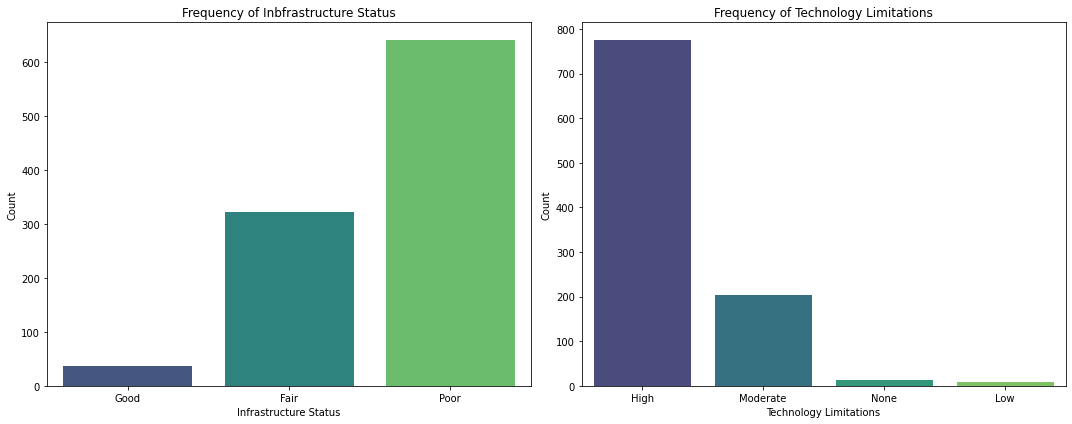

In [18]:
# Setting up our figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15,6))

# Plotting the frequency of Infrastructure Status
sns.countplot(data=infrastructure_data, x= "Infrastructure Status", ax=axes[0], order=["Good","Fair","Poor"], palette= "viridis")
axes[0].set_title("Frequency of Inbfrastructure Status")
axes[0].set_xlabel("Infrastructure Status")
axes[0].set_ylabel("Count")

# Plotting the frequency of Technology Limitations
sns.countplot(data=infrastructure_data, x= "Technology Limitations", ax=axes[1], palette= "viridis")
axes[1].set_title("Frequency of Technology Limitations")
axes[1].set_xlabel("Technology Limitations")
axes[1].set_ylabel("Count")

plt.tight_layout()

plt.show()

#### Relationship between `Infrastructure Status` and Technology Limitations

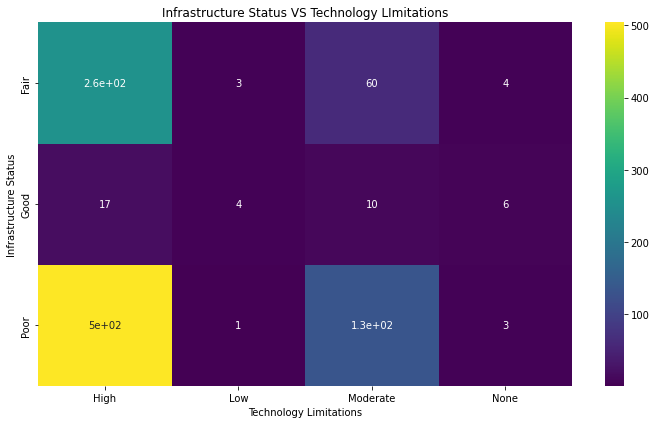

In [19]:
ct = pd.crosstab(infrastructure_data["Infrastructure Status"], infrastructure_data["Technology Limitations"])

plt.figure(figsize=(10,6))

sns.heatmap(data=ct, annot= True, cmap= "viridis")
plt.title("Infrastructure Status VS Technology LImitations")

plt.tight_layout()

plt.show()

From the heatmap, we can see that there is a high correlation between Poor Infrastructure Status and High Technology Limitations. We can assume that Energix experiences High Technology Limitations due to the poor state of their infrastructure and that this is what leads to their low production levels.

#### Correlation between High Tech Limitations, Poor Infrastructure Status and Energy Production

In [33]:
infrastructure_data["Poor Infrastructure"] = infrastructure_data["Infrastructure Status"].apply(lambda x: 1 if x== "Poor" 
                                                                                               else 0)
infrastructure_data["High Tech Lim"] = infrastructure_data["Technology Limitations"].apply(lambda x: 1 if x== "High" 
                                                                                               else 0)

infrastructure_data["Combined"] = infrastructure_data["Poor Infrastructure"] * infrastructure_data["High Tech Lim"]
merge_data = pd.merge(historical_data, infrastructure_data, on="Date/Time", how= "inner")

corr_coefficient = merge_data["Energy Production (kWh)"].corr(merge_data["Combined"])
corr_coefficient

-0.015877155348918325

#### Regulatory Changes and Compliance Costs
* We need to understand the impact of regulatory changes
* We'll visualize the frequency of various `Regulatory Changes` and the distribution of `Compliance Costs` associated with these changes from the `regulatory_data` dataset

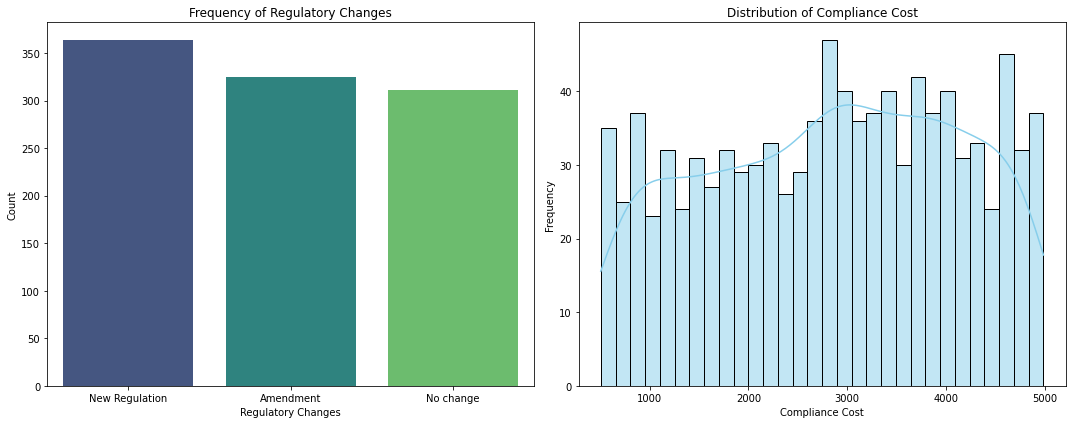

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

sns.countplot(data=regulatory_data, x="Regulatory Changes", ax= ax1, palette= "viridis")
ax1.set_title("Frequency of Regulatory Changes")
ax1.set_xlabel("Regulatory Changes")
ax1.set_ylabel("Count")

sns.histplot(data= regulatory_data, x= "Compliance Costs", ax= ax2,bins= 30,kde=True, color= "skyblue")
ax2.set_title("Distribution of Compliance Cost")
ax2.set_xlabel("Compliance Cost")
ax2.set_ylabel("Frequency")

plt.tight_layout()

plt.show()

#### Impact of Regulatory Changes and Operational Costs on Revenue
* We'll visualize the relationship between regulatory changes and the associated compliance costs as well as the operational costs to the revenue generated from the company.
* Revenue = Energy Consumption * Energy Price
* This will provide insight into the financial implications of regulatory changes and operational costs for Energix Enterprise.

In [23]:
historical_data["Revenue"] = historical_data["Energy Consumption (kWh)"] * historical_data["Energy Price"]

In [24]:
merge_regulatory_data = pd.merge(historical_data, regulatory_data, on="Date/Time", how= "inner")

merge_regulatory_data["Month"] = merge_regulatory_data["Date/Time"].dt.month
merge_regulatory_data["Year"] = merge_regulatory_data["Date/Time"].dt.year

monthly_aggregate_data = merge_regulatory_data.groupby(["Year", "Month"]).mean().reset_index()
monthly_aggregate_data["Year-Month"] = (monthly_aggregate_data["Year"].astype(str) + "-" 
                                        + monthly_aggregate_data["Month"].astype(str))

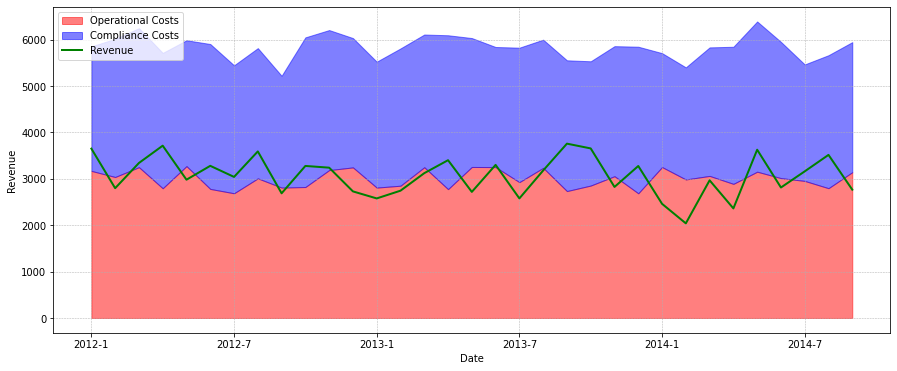

In [25]:
plt.figure(figsize=(15,6))

plt.fill_between(monthly_aggregate_data["Year-Month"], monthly_aggregate_data["Operational Costs"], color= "red", 
                 label= "Operational Costs", alpha= 0.5)
plt.fill_between(monthly_aggregate_data["Year-Month"], monthly_aggregate_data["Operational Costs"], 
                 monthly_aggregate_data["Operational Costs"] + monthly_aggregate_data["Compliance Costs"], 
                 color= "blue", label= "Compliance Costs", alpha= 0.5)

sns.lineplot(data=monthly_aggregate_data, x="Year-Month", y="Revenue", label= "Revenue", color= "green", linewidth= 2)

plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend(loc="upper left")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
labels = monthly_aggregate_data["Year-Month"].tolist()
n= 6
plt.xticks(labels[::n], rotation= 360)

plt.tight_layout

plt.show()

O.C ==> are costs associated with day to day operations of the company.
C.C ==> are incurred by the company to adhere to regulatory changes.



#### Analyzing Competition from Renewable Energy Providers
* To understand the competition from renewable energy providers and its impact on Energix Enterprise, we'll an alyze the Energy Source column from the historical_energy_data dataset.
* We'll visualize the trends in energy production based on the energy source (Fossil Fuels vs. Renewables) over time. This will give us insight into how the production from renewanbles has evolved and potentially affected the company's market share.

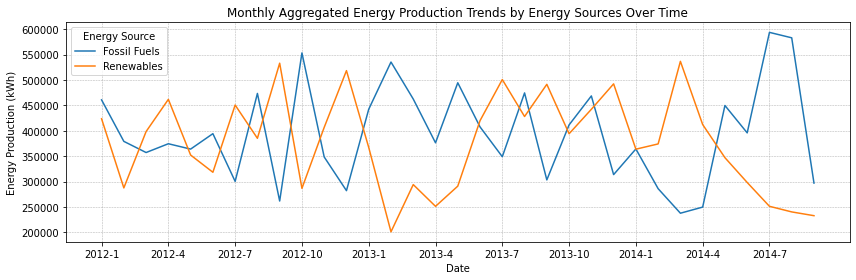

In [32]:
aggregate_data = historical_data.groupby(["Year", "Month", "Energy Source"]).sum()["Energy Production (kWh)"].reset_index()

aggregate_data["Year-Month"] = aggregate_data["Year"].astype(str) + "-" + aggregate_data["Month"].astype(str)

plt.figure(figsize=(12, 4))

sns.lineplot(data=aggregate_data, x="Year-Month", y= "Energy Production (kWh)", hue= "Energy Source", ci= None)

plt.title("Monthly Aggregated Energy Production Trends by Energy Sources Over Time")
plt.xlabel("Date")
plt.ylabel("Energy Production (kWh)")
plt.legend(title="Energy Source")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

labels= aggregate_data["Year-Month"].tolist()
n= 6
plt.xticks(labels[::n], rotation=360)

plt.tight_layout()

plt.show()

##### General Insights:

1. Dynamic Energy Landscape: Energix Enterprise experiences marked variances in energy production, consumption, and demand patterns. There are distinct periods where the demand overshadows production highlighting potential areas of concern in market stability and supply consistency. 
2. Pricing Volatility: Energix's energy pricing exhibits variability in alignment with broader market price trends. Notably, the energy price remains uncorrelated with energy demand, presenting potential challenges in sales predictability and revenue forecasting.
3. Infrastructure & Technology Concerns: A significant portion of the company's infrastructure is categorized as 'Poor Coupled with pronounced technology limitations. there's a compelling case for comprehensive infrastructure rejuvenation. Preliminary analysis suggests that periods of 'Poor infrastructure status and "High' technology constraints may correlate with diminished energy production.
4. Regulatory & Financial Implications: Energix is continually navigating a changing regulatory landscape, with new mandates and modifications to existing ones. The financial ramifications, especially in terms of compliance costs and operational expenditures, are substantial. A juxtaposition of these costs with the firm's current revenue trajectory indicates a pressing profitability challenge. 
5. Emergence of Renewables: The energy market is witnessing a paradigm shift with renewables gaining prominence. Data trends suggest instances where renewable energy production has eclipsed that of fossil fuels. For Energix, this underscores the dual challenges of evolving competition and potential erosion of market share

##### Resilience Planning and Recommendations

1. Balanced Energy Portfolio: Energix Enterprise should consider diversifying its energy production portfolio to mitigate the risks associated with fluctuations in demand and production. A balanced mix of renewable and non-renewable sources can help stabilize the energy supply and meet demand more consistently. 

2. Dynamic Pricing Model: Given that energy price doesn't correlate with energy demand. Energix should consider implementing a dynamic pricing model. This model can adjust prices based on demand, production costs, and other market factors. Such a model can help in improving sales during high-demand periods and maintaining profitability during low-demand times.

3. Infrastructure Revamp: With most of the company's infrastructure in 'Poor' status and high technology limitations, Energix should prioritize investments in infrastructure upgrades. Modernizing infrastructure can lead to increased production efficiency, reduced downtimes, and potentially higher energy output.

4. Regulatory Compliance Fund and Operational Cost: Given the periodic introduction of new regulations and. The associated compliance costs and also operational cost. Energix should establish a dedicated fund or reserve to address these unforeseen expenses. This approach can help in budgeting and ensuring that costs don't significantly impact the company's bottom line. 

5. Embrace Renewables The trend towards renewable energy is evident. Energix should consider increasing its investments in renewable energy technologies and infrastructure. This not only aligns with global sustainability goals but also positions the company to better compete in an evolving energy market.

6. Cost Management & Revenue Generation. Considering the operational and compliance costs are impacting profitability, Energix should undertake a thorough review of its operations to identify cost-saving opportunities Additionally, exploring alternative revenue streams, such as energy storage solutions or consultancy services, can further bolster the company's financial position.

7. Stakeholder Engagement Engage with regulatory bodies proactively to stay ahead of potential regulatory changes. This proactive approach can help in better preparation and can also influence regulations in a manner favorable to Energix.

8. Market Research & Consumer Insights: Conduct regular market research to understand consumer preferences, especially concerning renewable energy. This can guide Energix's strategy in terms of energy source diversification and pricing.

In conclusion, while Energix faces challenges in terms of fluctuating demand, aging infrastructure, and increasing competition from renewables, there are clear strategic paths available By modernizing infrastructure. diversifying energy sources, and adopting a dynamic pricing model. Energix can position itself for sustained growth and profitability in the future energy market.
